# K Means Clustering
Usually when dealing with an unsupervised learning problem, its difficult to get a good measure of how well the model performed. For this project, we will use data from the UCI archive based off of red and white wines (this is a very commonly used data set in ML).  
We will then add a label to the a combined data set, we'll bring this label back later to see how well we can cluster the wine into groups.

In [1]:
df1 <- read.csv('winequality-red.csv', sep = ';')
df2 <- read.csv('winequality-white.csv', sep = ';')

In [2]:
head(df1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [3]:
head(df2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [4]:
df1 <- cbind(df1, label='red')

In [5]:
head(df1)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [6]:
df2 <- cbind(df2, label='white')
head(df2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


In [7]:
print(c(dim(df1), dim(df2)))

[1] 1599   13 4898   13


In [8]:
wine <- rbind(df1, df2)
dim(wine)

[1] 6497   13

In [9]:
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
library(ggplot2)

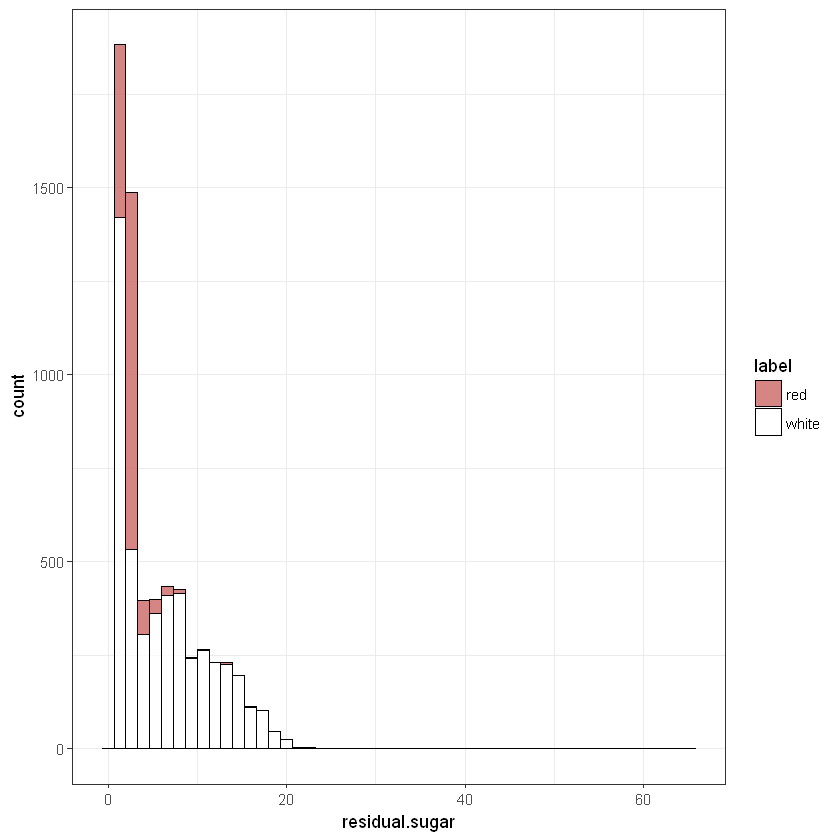

In [11]:
ggplot(wine, aes(residual.sugar, fill=label)) + geom_histogram(color='black', bins = 50, alpha = 0.8) + theme_bw() + scale_fill_manual(values = c('#CC6666', 'white'))

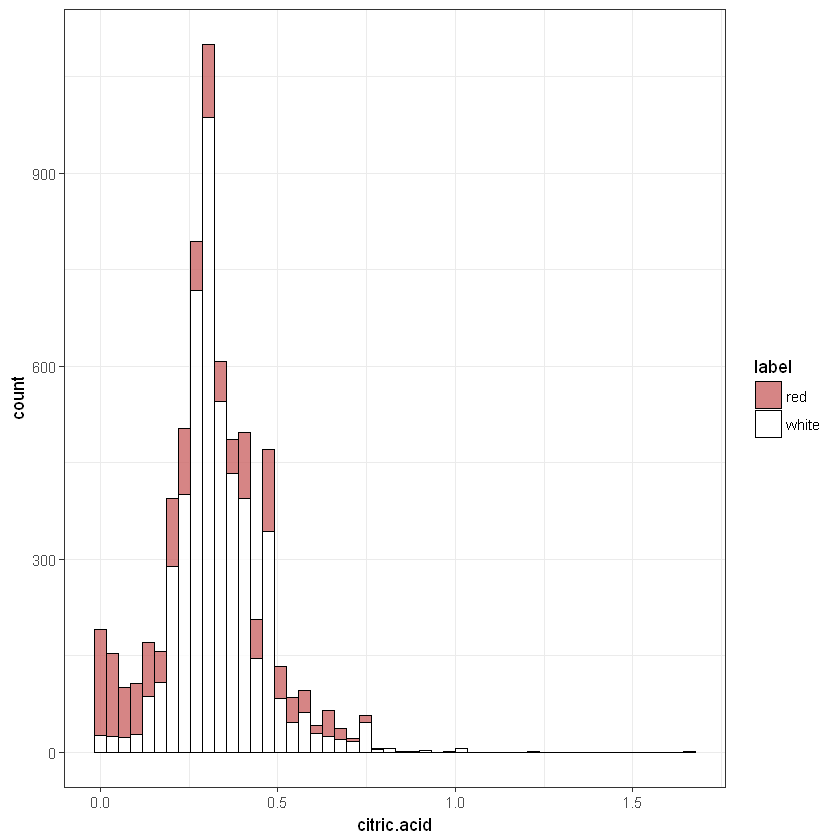

In [12]:
ggplot(wine, aes(citric.acid, fill=label)) + geom_histogram(color='black', bins = 50, alpha = 0.8) + theme_bw() + scale_fill_manual(values = c('#CC6666', 'white'))

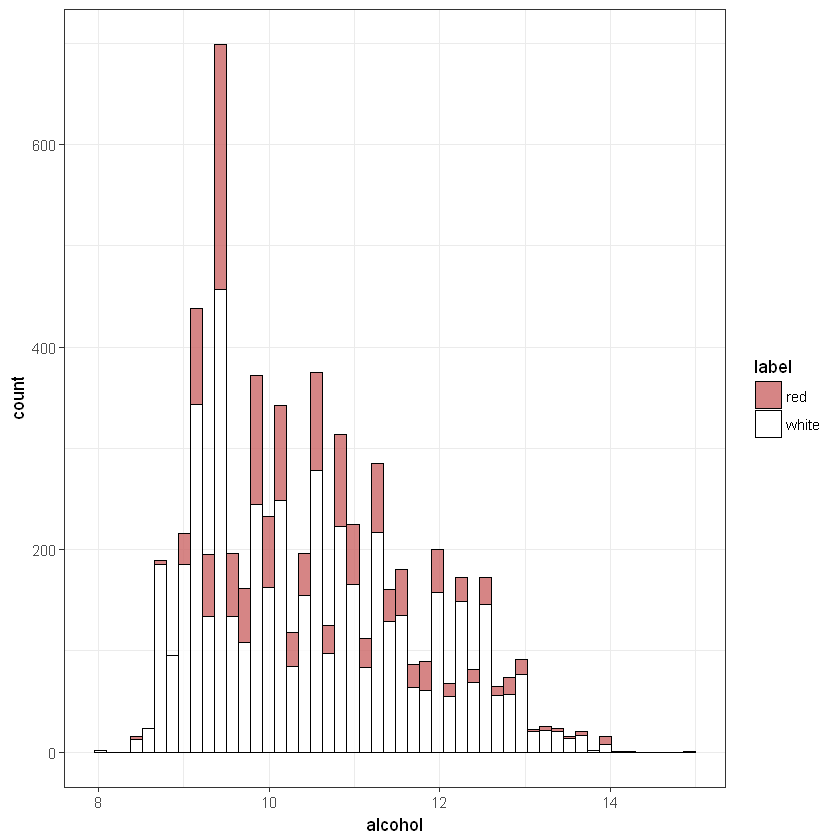

In [13]:
ggplot(wine, aes(alcohol, fill=label)) + geom_histogram(color='black', bins = 50, alpha = 0.8) + theme_bw() + scale_fill_manual(values = c('#CC6666', 'white'))

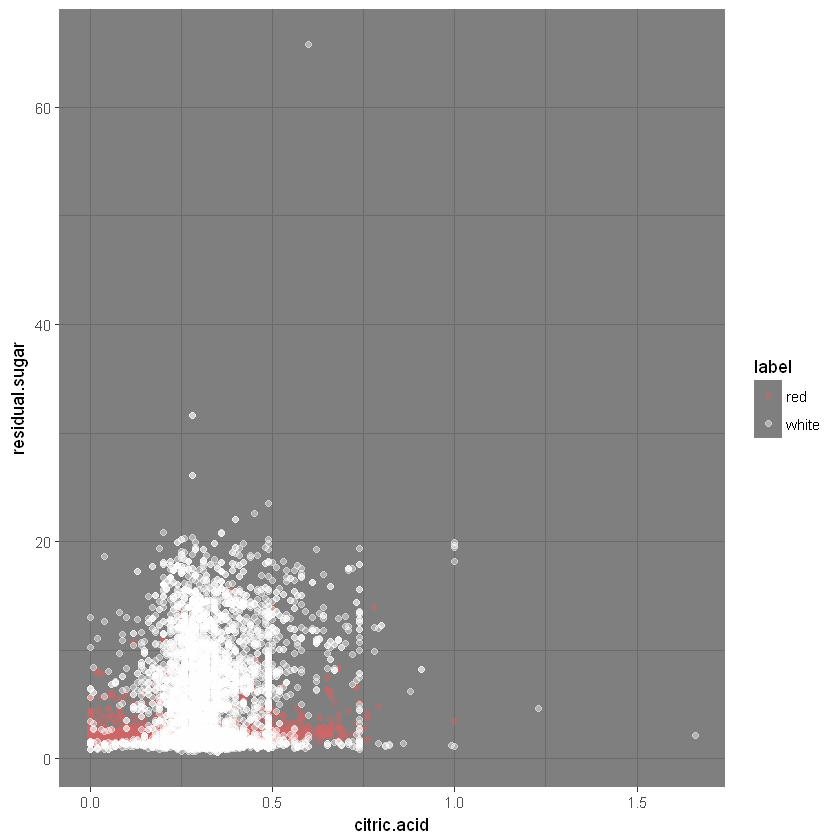

In [14]:
ggplot(wine, aes(citric.acid, residual.sugar, color=label)) + geom_point(alpha=0.4) + theme_dark() + scale_color_manual(values = c('#CC6666', 'white'))

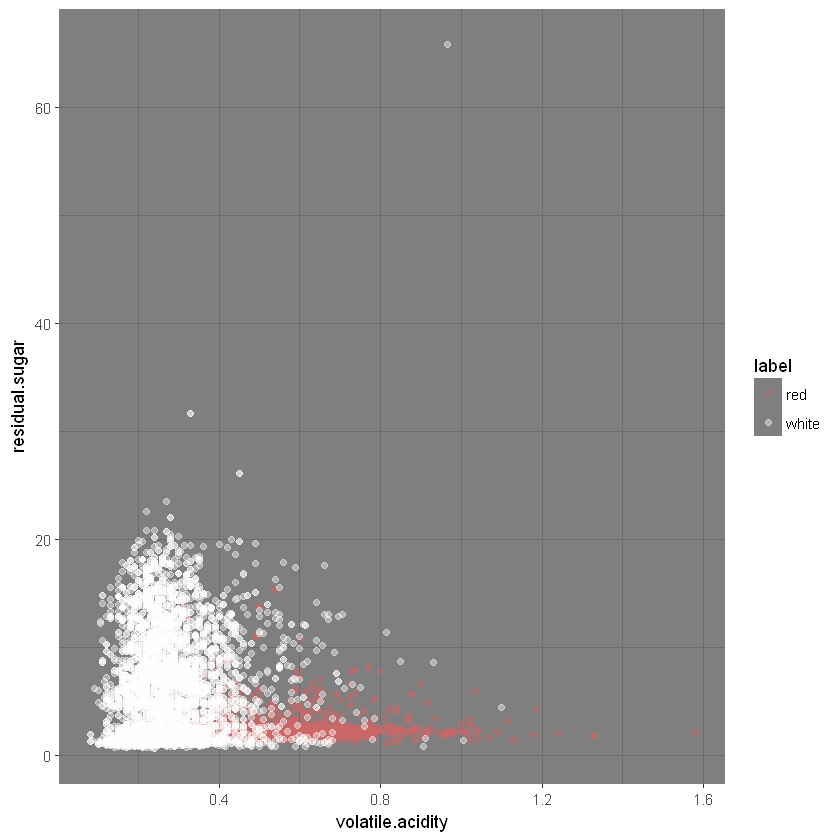

In [15]:
ggplot(wine, aes(volatile.acidity, residual.sugar, color=label)) + geom_point(alpha=0.4) + theme_dark() + scale_color_manual(values = c('#CC6666', 'white'))

In [16]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [17]:
clus.data <- select(wine, -label)
head(clus.data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [28]:
wine.cluster <- kmeans(clus.data, 2)

In [29]:
wine.cluster$centers

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.623219,0.4086378,0.2908725,3.076425,0.06580983,18.39868,63.26318,0.9945736,3.254882,0.5724145,10.79722,5.810541
2,6.904812,0.2871659,0.3397642,7.244809,0.04859257,39.75590,155.69246,0.9947903,3.190808,0.4999485,10.25932,5.824343


In [30]:
table(wine$label, wine.cluster$cluster)

       
           1    2
  red   1514   85
  white 1294 3604

In [31]:
myorder <- c('white', 'red')
white_red <- as.numeric(factor(wine$label, levels = myorder))

In [32]:
table(white_red, wine.cluster$cluster)

         
white_red    1    2
        1 1294 3604
        2 1514   85